In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [86]:
db = pd.read_excel('Proyecto.xls')

In [87]:
db

,Anio,Matrimonios_Cantidad,Divorcios_Cantidad,Victimas_Cantidad,Victimas_Hombre,Victimas_Mujer,Vic_Urban,Vic_Rural,Vic_Ign,Vic_Solteros,...,Vic_Edu_Ignorado,Vic_Trabaja,Vic_No_Trabaja,Vic_Hijos_0,Vic_Hijos_1,Vic_Hijos_2,Vic_Hijos_3,Vic_Hijos_4,Vic_Hijos_5,Vic_Hijos_6+
0,2008,52.315,2.834,23.721,2.290,21.431,12.988,8.248,2.485,5.470,...,0.454,8.002,15.557,1.927,4.867,4.430,3.488,1.945,1.036,1.422
1,2009,62.104,3.004,31.497,2.985,28.512,16.539,11.816,3.142,8.144,...,0.557,10.721,20.583,5.392,6.473,5.748,4.597,2.388,1.344,1.787
2,2010,73.124,3.645,32.017,2.858,29.159,16.427,12.553,3.037,8.918,...,0.515,10.385,21.361,4.877,6.605,6.028,4.405,2.481,1.381,1.651
3,2011,78.286,4.344,33.484,2.906,30.578,17.672,13.588,2.224,9.441,...,0.692,10.679,22.536,3.392,7.194,6.509,4.764,2.579,1.469,1.764
4,2012,84.253,5.157,36.107,2.967,33.140,19.237,15.074,1.796,10.725,...,0.623,11.505,24.347,3.229,8.010,7.098,5.102,2.676,1.386,1.727
5,2013,80.750,5.542,36.170,3.252,32.918,19.365,14.670,2.135,11.658,...,1.102,11.513,24.362,3.362,8.084,7.259,5.071,2.632,1.420,1.578
6,2014,79.496,5.575,34.330,3.233,31.097,19.164,14.173,993.000,3.151,...,0.857,10.544,23.530,3.147,7.902,7.135,4.988,2.448,1.298,1.456
7,2015,79.177,5.726,31.929,3.221,28.708,18.451,12.608,870.000,2.883,...,0.841,10.307,21.405,3.535,7.562,6.819,4.536,2.091,1.209,1.361
8,2016,69.613,5.665,31.190,3.295,27.895,17.668,12.621,901.000,3.022,...,0.644,9.996,20940.000,3.851,7.136,6.491,4.168,2.024,1.068,1.102
9,2017,71.597,5.808,30.384,3.675,26.709,17.348,12.279,757.000,2.832,...,0.611,10.423,19.772,3.877,7.088,6.305,4.178,1.997,1.004,1.150


In [14]:
db.columns

Index(['Anio', 'Matrimonios_Cantidad'], dtype='object')

In [43]:
size = db['Victimas_Cantidad'].to_numpy()
size

array([23.721, 31.497, 32.017, 33.484, 36.107, 36.17 , 34.33 , 31.929,
       31.19 , 30.384])

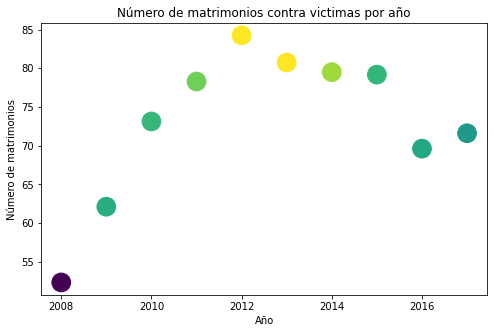

In [59]:
plt.figure(figsize=(8,5))
plt.scatter(db['Anio'], db['Matrimonios_Cantidad'], s=350, c=size)
plt.title('Número de matrimonios contra victimas por año')
plt.ylabel('Número de matrimonios')
plt.xlabel('Año')
plt.axis()
plt.show()

In [35]:
db['Victimas_Cantidad'].to_numpy()

array([23.721, 31.497, 32.017, 33.484, 36.107, 36.17 , 34.33 , 31.929,
       31.19 , 30.384])

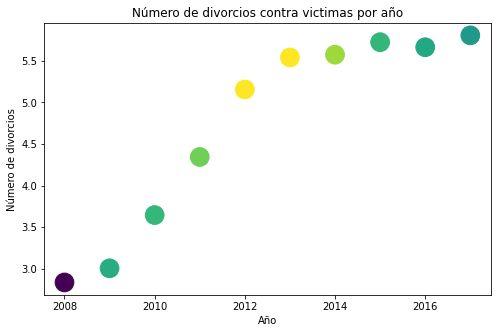

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(db['Anio'], db['Divorcios_Cantidad'], s=350, c=size)
plt.title('Número de divorcios contra victimas por año')
plt.ylabel('Número de divorcios')
plt.xlabel('Año')
plt.axis()
plt.show()

<Figure size 1080x720 with 0 Axes>

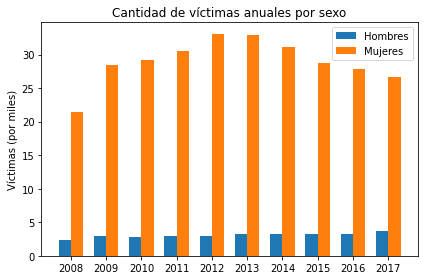

In [74]:
plt.figure(figsize=(15,10))
x = np.arange(len(db['Anio']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, db['Victimas_Hombre'], width, label='Hombres')
rects2 = ax.bar(x + width/2, db['Victimas_Mujer'], width, label='Mujeres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Víctimas (por miles)')
ax.set_title('Cantidad de víctimas anuales por sexo')
ax.set_xticks(x)
ax.set_xticklabels(db['Anio'])
ax.legend()

fig.tight_layout()

plt.show()

<Figure size 1080x720 with 0 Axes>

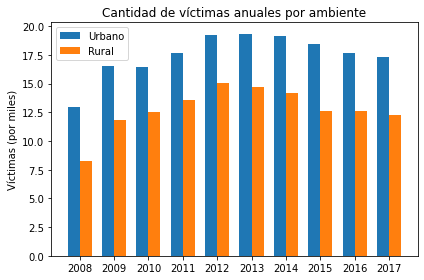

In [76]:
plt.figure(figsize=(15,10))
x = np.arange(len(db['Anio']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, db['Vic_Urban'], width, label='Urbano')
rects2 = ax.bar(x + width/2, db['Vic_Rural'], width, label='Rural')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Víctimas (por miles)')
ax.set_title('Cantidad de víctimas anuales por ambiente')
ax.set_xticks(x)
ax.set_xticklabels(db['Anio'])
ax.legend()

fig.tight_layout()

plt.show()

<Figure size 1080x720 with 0 Axes>

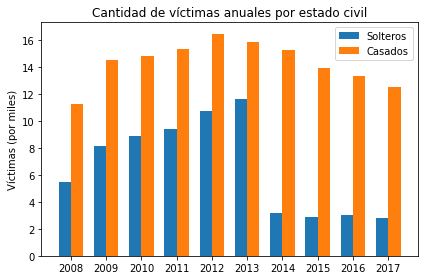

In [78]:
plt.figure(figsize=(15,10))
x = np.arange(len(db['Anio']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, db['Vic_Solteros'], width, label='Solteros')
rects2 = ax.bar(x + width/2, db['Vic_Casados'], width, label='Casados')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Víctimas (por miles)')
ax.set_title('Cantidad de víctimas anuales por estado civil')
ax.set_xticks(x)
ax.set_xticklabels(db['Anio'])
ax.legend()

fig.tight_layout()

plt.show()

<Figure size 1440x1080 with 0 Axes>

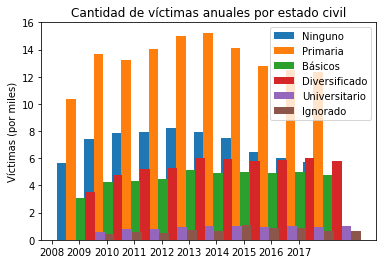

In [88]:
plt.figure(figsize=(20,15))
x = np.arange(len(db['Anio']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width, db['Vic_Edu_Ninguno'], width, label='Ninguno')
rects2 = ax.bar(x + width*2, db['Vic_Edu_Primaria'], width, label='Primaria')
rects3 = ax.bar(x + width*3, db['Vic_Edu_Básico'], width, label='Básicos')
rects4 = ax.bar(x + width*4, db['Vic_Edu_Diversificado'], width, label='Diversificado')
rects5 = ax.bar(x + width*5, db['Vic_Edu_Universitario'], width, label='Universitario')
rects6 = ax.bar(x + width*6, db['Vic_Edu_Ignorado'], width, label='Ignorado')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Víctimas (por miles)')
ax.set_title('Cantidad de víctimas anuales por estado civil')
ax.set_xticks(x)
ax.set_xticklabels(db['Anio'])
ax.legend()

plt.show()